In [1]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/drive/MyDrive/woc files/classification_train.csv')

In [4]:
x_train=np.array(df.iloc[:,2:])
y_train=np.array(df.iloc[:,1])
print(x_train.shape)
print(y_train.shape)


mu=np.mean(x_train,axis=0)
sigma=np.std(x_train,axis=0)
x_train_norm=((x_train-mu)/sigma)

o=np.unique(y_train)#types of output
l=len(o)#no of tyoes of output
# Yt=np.reshape(np.arange(np.shape(y_train),dtype=int),(np.shape(y_train),1))
# for i in range(l):
#   ta=y_train==o[i]
#   y_train[ta]=int(i)

x_train_train=x_train_norm[:24000,:]
x_test=x_train_norm[24000:,:]
y_train_train=y_train[:24000]
y_test=y_train[24000:]

Xt = x_train_train
m,n=Xt.shape
yt = np.reshape(y_train_train,(m,1))
m,n



Yt=np.zeros((m,l))
for i in range(l):
  tem9=yt.reshape(m)==i
  Yt[tem9,i]=1



Yt




(30000, 784)
(30000,)


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

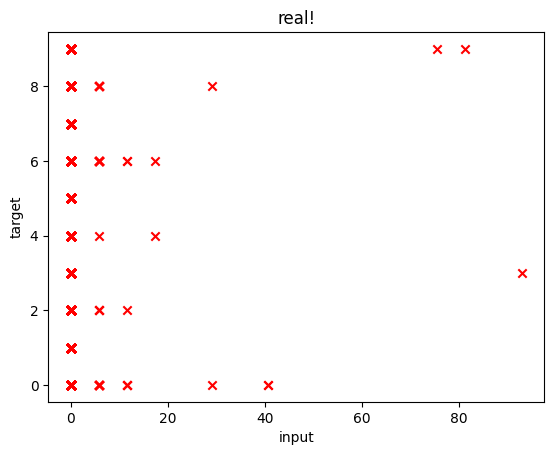

In [5]:
RW=np.random.rand(n,l)/n
RB=np.random.rand(1,l)

plt.scatter(Xt[:,1],yt,marker='x',c='r')
plt.title("real!")
plt.ylabel("target")
plt.xlabel("input")
plt.show()

In [6]:
def Z(X,W,B):#z is function/model
  z1= np.matmul(X,W)+B
  return z1
def A(X,W,B):#sigmiod funtion
  m,n=X.shape
  tempvar = np.exp(-1*Z(X,W,B))
  a1=1/(1+tempvar)
  return a1


def C(X,Y,W,B,lam):#cost
  m,n=X.shape
  c1=np.sum(Y*np.log(A(X,W,B)+1e-8),axis=0)+np.sum((1-Y)*np.log(1-A(X,W,B)+1e-8),axis=0)-(lam*np.sum(W**2,axis=0)/2)
  c1=(-1*c1)/m
  return c1
print(C(Xt,Yt,RW,RB,0.1))

def D(X,Y,W,B,lam): #D is derivative for desent
  m,n=X.shape
  o=np.unique(y_train_train)#types of output
  l=len(o)#no of tyoes of output
  db1=(np.sum((A(X,W,B)-Y),axis=0)/m)
  dw1=((np.matmul(X.T,A(X,W,B)-Y)+(lam*(W)))/m)
  return dw1,db1

def p(X,W,B): #pridiction
  y4=A(X,W,B)
  y5=np.argmax(y4,axis=1)
  return y5


[0.87154319 0.97434559 0.73252231 0.81494363 1.04228142 0.88605449
 0.97883171 1.01278081 1.18652273 0.84604661]


In [7]:
def g(X,Y,W,B,al,it,lam): #g is gradiant
  m,n=X.shape
  o=np.unique(y_train_train)#types of output
  l=len(o)#no of tyoes of output
  c_log=np.zeros((100,l))
  for i in range(it):
    dW,dB = D(X,Y,W,B,lam)
    W=(W-al*dW)
    B=(B-al*dB)
    print('',end='.')
    c_log[i]=C(X,Y,W,B,lam)
    if (i+1)%10==0:
      print(c_log[i//10])
  fig,(ax1,ax2)=plt.subplots(1,2)
  ax1.plot(c_log[:20,:])
  ax2.plot(20+np.arange(np.shape(c_log[20:,:])[0]),c_log[20:,:])
  ax1.set_title("cost vs per 100 iterations")
  ax2.set_title("cost vs per 100 iterations")
  plt.show()
  print(f"i={it},W={W},B={B},cost={C(X,Y,W,B,lam)}")
  return W,B

..........[0.3143902  0.15507756 0.29895714 0.27814748 0.42330854 0.31736337
 0.4270141  0.30343021 0.21283182 0.226527  ]
train 80.375 %
cv 79.55 %
..........[0.26745653 0.13462022 0.26020227 0.23537918 0.359024   0.26751759
 0.367922   0.25682569 0.18084095 0.19121791]
train 81.2125 %
cv 80.01666666666667 %
..........[0.24397549 0.12368879 0.24099667 0.21407832 0.32658265 0.24218006
 0.33872809 0.23240083 0.16568984 0.1722267 ]
train 81.65416666666667 %
cv 80.45 %
..........[0.2286873  0.1161668  0.22865385 0.20014475 0.30499729 0.22575328
 0.31977782 0.21612545 0.15611702 0.1595835 ]
train 81.925 %
cv 80.61666666666667 %
..........[0.21757356 0.11042385 0.21969435 0.19002972 0.28939115 0.21376426
 0.30608715 0.2040338  0.14922377 0.15025206]
train 82.16250000000001 %
cv 80.86666666666666 %


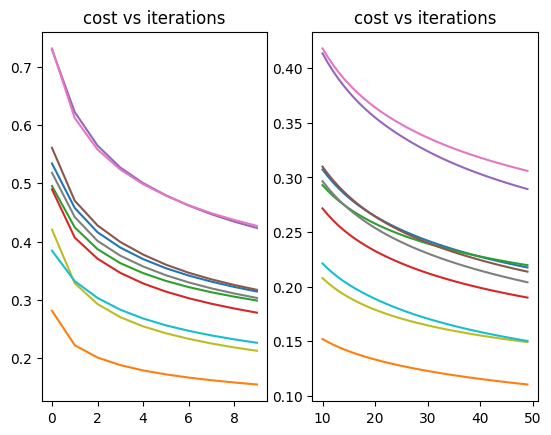

i=50,cost=[0.21757356 0.11042385 0.21969435 0.19002972 0.28939115 0.21376426
 0.30608715 0.2040338  0.14922377 0.15025206]
2350


In [20]:
def g(X,Y,W,B,alo,dr,it,lam,bs): #g is gradiant
  m,n=X.shape
  o=np.unique(y_train_train)#types of output
  l=len(o)#no of tyoes of output
  c_log=np.zeros((it,l))

  VdW=0
  VdB=0
  SdW=0
  SdB=0
  VdWc=0
  VdBc=0
  SdWc=0
  SdBc=0
  bsr=(m//(bs+1))+1
  t=0
  for i in range(it):
    al=(1/(1+(dr*i)))*alo
    for k in range(bsr):
      Xmb=X[(bs*k):(bs*(k+1)),:]
      Ymb=Y[(bs*k):(bs*(k+1)),:]
      dW,dB = D(Xmb,Ymb,W,B,lam)
      t=t+1
      VdW=(0.9*VdW)+((0.1)*dW)
      VdB=(0.9*VdB)+((0.1)*dB)
      SdW=(0.999*SdW)+((0.001)*(dW**2))
      SdB=(0.999*SdB)+((0.001)*(dB**2))
      VdWc=VdW/(1-(0.9**t))
      VdBc=VdB/(1-(0.9**t))
      SdWc=SdW/(1-(0.999**t))
      SdBc=SdB/(1-(0.999**t))
      W=(W-((al*VdWc)/(1e-8+(SdWc**(0.5)))))
      B=(B-((al*VdBc)/(1e-8+(SdBc**(0.5)))))
    m,n=X.shape
    c_log[i]=C(X,Y,W,B,lam)
    print('',end='.')
    if (i+1)%10==0:
      print(c_log[i])
      lolo=(p(X,W,B)-np.reshape(yt,m))
      accuracy=(np.count_nonzero(lolo==0)/m)*100
      print('train',accuracy,'%')
      lolo=(p(x_test,W,B)-np.reshape(y_test,x_test.shape[0]))
      accuracy=(np.count_nonzero(lolo==0)/x_test.shape[0])*100
      print('cv',accuracy,'%')
  fig,(ax1,ax2)=plt.subplots(1,2)
  ax1.plot(c_log[:10])
  ax2.plot(10+np.arange(len(c_log[10:])),c_log[10:])
  ax1.set_title("cost vs iterations")
  ax2.set_title("cost vs iterations")
  plt.show()
  print(f"i={it},cost={C(X,Y,W,B,lam)}")
  print(t)
  return W,B
W,B= g(Xt,Yt,RW,RB,0.01,1,50,0.1,512)

In [16]:

lolo=(p(Xt,W,B)-np.reshape(yt,m))
print(np.unique(p(Xt,W,B), return_counts=True))
print(np.unique(lolo, return_counts=True))
accuracy=(np.count_nonzero(lolo==0)/m)*100
print(accuracy,'%')

lolo=p(x_test,W,B)-y_test
print(np.unique(y_test, return_counts=True))
print(np.unique(lolo, return_counts=True))
accuracy=(np.count_nonzero(lolo==0)/6000)*100
print(accuracy,'%')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([2611, 2359, 2304, 2465, 2616, 2463, 1964, 2436, 2400, 2382]))
(array([-9, -8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9]), array([    1,     6,     3,   376,    24,   306,   173,   649,   103,
       20968,   109,   748,   165,   201,    18,   127,     3,    19,
           1]))
87.36666666666667 %
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([605, 619, 614, 598, 599, 582, 624, 607, 583, 569]))
(array([-8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8]), array([   4,    1,  100,   12,   88,   54,  205,   47, 5031,   42,  230,
         54,   64,    3,   48,    1,   16]))
83.85000000000001 %


In [ ]:

dft=pd.read_csv('/content/classification_test.csv')

x_test_final=np.array(dft.iloc[:,1:])
print(x_test_final)


x_test_final_norm=((x_test_final-mu)/sigma)

y_p=p(x_test_final_norm,W,B)


print(y_p)



dft['pridiction']=y_p
print(dft.head(5))


l=dft.columns
dftf=dft.drop(columns=l[1:-1])
print(dftf)





dftf.to_csv('/predictions of classification with 1vall.csv')